In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import numpy.ma as ma
import struct
import os
import xarray as xr
import glob
import datetime 
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns

# ESIO Imports
import esio
import esiodata as ed

"...in calculating ice extent, algorithms assume the pole hole is  covered by ice at greater than 15 percent, and in calculating ice area, both simply do not include the area of the pole hole."

https://nsidc.org/sites/nsidc.org/files/files/NSIDC-special-report-19.pdf

https://nsidc.org/data/g02135?qt-data_set_tabs=2#qt-data_set_tabs   4.2.3 Arctic Pole Hole


In [2]:
# General plotting settings
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [3]:
#############################################################
# Load in Data
#############################################################

E = ed.esiodata.load()

# Load in Obs
data_dir = E.data_dir
grid_dir = E.grid_dir
# fig_dir = os.path.join(E.fig_dir, 'obs', 'NSIDC_0081' , 'standard')
da_51_in = xr.open_mfdataset(E.obs['NSIDC_0051']['sipn_nc']+'/NSIDC_0051.nc')
da_81_in = xr.open_mfdataset(E.obs['NSIDC_0081']['sipn_nc']+'/NSIDC_0081.nc')
da_79_in = xr.open_mfdataset(E.obs['NSIDC_0079']['sipn_nc']+'/NSIDC_0079.nc')

ds_ext = xr.open_dataset(os.path.join(E.obs['NSIDC_extent']['sipn_nc'], 'N_seaice_extent_daily_v3.0.nc'))
ds_ext = ds_ext.rename({'datetime':'time'})

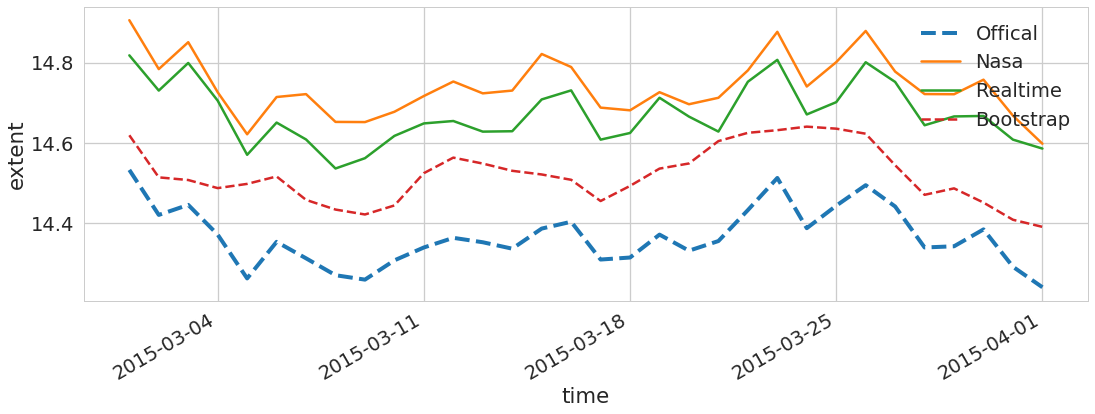

In [14]:
DS=datetime.datetime(2015,3,1)
DE=datetime.datetime(2015,4,1)
plt.figure(figsize=(18,6))
ds_ext.Extent.sel(time=slice(DS,DE)).plot(label='Offical', linewidth=4, linestyle='--')
da_51_in.extent.sel(time=slice(DS,DE)).plot(label='Nasa')
da_81_in.extent.sel(time=slice(DS,DE)).plot(label='Realtime')
da_79_in.extent.sel(time=slice(DS,DE)).plot(label='Bootstrap', linestyle='--')
plt.legend()

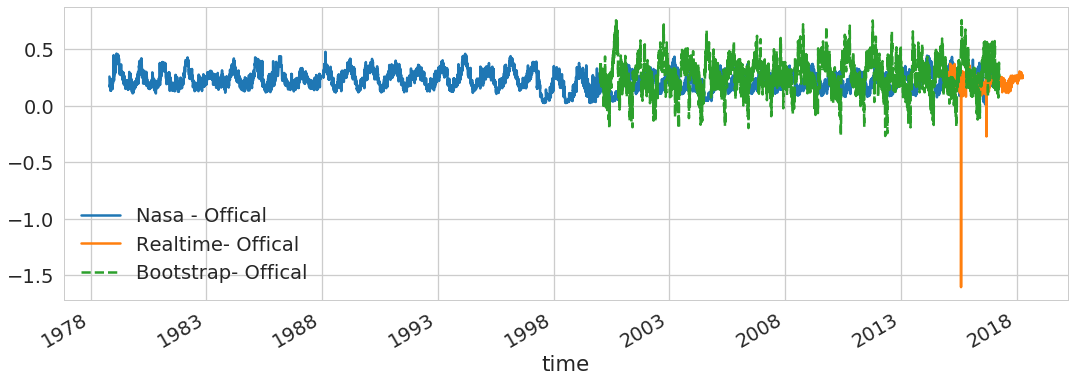

In [15]:
plt.figure(figsize=(18,6))
(da_51_in.extent-ds_ext.Extent).plot(label='Nasa - Offical')
(da_81_in.extent-ds_ext.Extent).plot(label='Realtime- Offical')
(da_79_in.extent-ds_ext.Extent).plot(label='Bootstrap- Offical', linestyle='--')
plt.legend()